<a href="https://colab.research.google.com/github/mirayeker/olimpiyat_ExploratoryDataAnalysis/blob/master/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
#veriyi içeri aktaralım
veri=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/exploratory_data_analysis/olimpiyat.csv")
veri.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## veri hakkında bilgiler

In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## verinin temizlenmesi
- sütün isimlerinin düzeltimesi
- yararsız verilerin çıkarılması ve düzenlemesi
- kayıp veri sorunu

In [4]:
veri.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
#sütün isimlerini değiştirelim:
veri.rename(columns={'ID' : 'id',
                    'Name' : 'isim',
                    'Gender' :'cinsiyet',
                    'Age' : 'yas',
                    'Height' : 'boy',
                    'Weight' : 'kilo',
                    'Team' : 'takim',
                    'NOC' : 'uok',
                    'Games' : 'oyunlar',
                    'Year' : 'yil',
                    'Season' : 'sezon',
                    'City' : 'sehir',
                    'Sport' : 'spor',
                    'Event' : 'etkinlik',
                    'Medal' : 'madalya'},inplace=True)
veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [6]:
# drop fonksiyonu ile id ve oyunlar sütününü çıkaralım:
veri=veri.drop(["id","oyunlar"], axis=1) #axis =1 sütünları temsil ediyor

In [7]:
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Boy ve Kilo Kayıp Veri Doldurma 
- bulunan kayıp verileri etkinlik ortalamasına göre etkinlikortalamasına göre dolduracağız.

In [8]:
essiz_etkinlik= pd.unique(veri.etkinlik)
print("essiz etkinlik sayısı: {}".format(len(essiz_etkinlik)))
essiz_etkinlik[:10]

essiz etkinlik sayısı: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [9]:
#her bir etkinliği iteratif olarak dolaş
# etkinlik özelinde boy ve kilo ortalamalarını hesapla
#etkinlik özelinde kayıp boy ve kilo değerlerini etkinlik ortalamalarına eşitle
veri_gecici=veri.copy() # veriyi bozmamak için kopyasını oluşturduk
boy_kilo_liste=["boy","kilo"]

for e in essiz_etkinlik:
  #etkinlilik filtresi oluşturalım:
  etkinlik_filtre=veri_gecici.etkinlik == e
  #veriyi etkinliğe göre filtreleyim:
  veri_filtreli=veri_gecici[etkinlik_filtre]
  # boy ve kilo için etkinlik özelinde ortamları hesaplayalım:
  for s in boy_kilo_liste:
    ortalama=np.round(np.mean(veri_filtreli[s]),2) 
    #eger etkinlik özelinde ortalama varsa
    if ~np.isnan(ortalama):
      veri_filtreli[s]=veri_filtreli[s].fillna(ortalama)
    else: #eger etkinlik özelinde ortalama varsa ortalamayı hesapla
      tum_veri_ortalamasi=np.round(np.mean(veri[s]),2)
      veri_filtreli[s]=veri_filtreli[s].fillna(tum_veri_ortalamasi)
  #etkinlik özelinde kayıp değerleri doldurulmuş olan veriyi, veri_gecici'ye esitlenecek
  veri_gecici[etkinlik_filtre]=veri_filtreli

#kayıp degerleri giderilmiş olan geciciyi veriyi gercek veriye esitle
veri=veri_gecici.copy()
veri.info() #boy ve kilo 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [10]:
# yas sütununda bulunan kayıp değeri bulalım.
yas_ortalamasi=np.round(np.mean(veri.yas),2)
yas_ortalamasi=np.round(np.mean(veri.yas),2)
print("Yaş ortalaması: {}".format(yas_ortalamasi))
veri["yas"]=veri["yas"].fillna(yas_ortalamasi)
veri.info()

Yaş ortalaması: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


## Madalya almayan sporcuları Veri Setinden Çıkar:

In [11]:
madalya_degiskeni=veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

231333

In [12]:
madalya_degiskeni_filtresi= ~pd.isnull(madalya_degiskeni)

In [13]:
veri=veri[madalya_degiskeni_filtresi]
veri.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [14]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [15]:
#sonradan kullanbilmek için veriyi kaydediyoruz
veri.to_csv("/content/drive/MyDrive/Colab_Notebooks/exploratory_data_analysis/olimpiyatlar_temizlenmis.csv",index= False)

# Tek Değişkenli Veri analizi 


### Sayısal Değişkenler 
- boy
- yas 
- yil 
- kilo 
-> Veri sıklığı bilgilerini histogram grafiği sayesinde inceleyeceğiz.
-> Temel istatistik bilgilerini ise kutu grafiği sayesinde inceleyeceğiz. 

In [16]:
 # histogram grafiği çizdireceğimiz fonksiyonu yazalım:

def plotHistogram(degisken):
  """
  girdi -> değisken/sütun adı
  çıktı -> ilgili değişkenin frekans sayısı
  """
  
  plt.figure()
  plt.hist(veri[degisken],bins =85, color="blue")
  plt.xlabel(degisken)
  plt.ylabel("Frekans")
  plt.title("Veri Sıklığı - {}".format(degisken))
  plt.show()


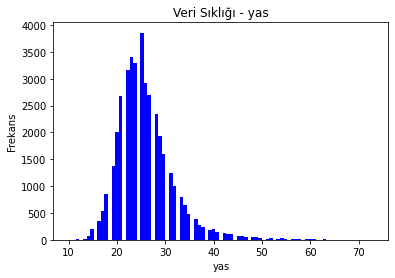

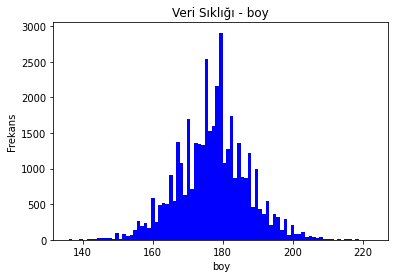

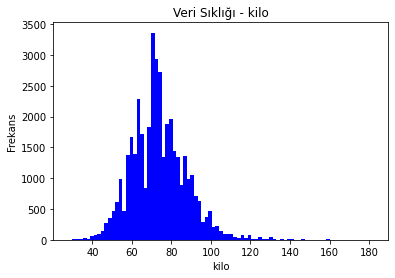

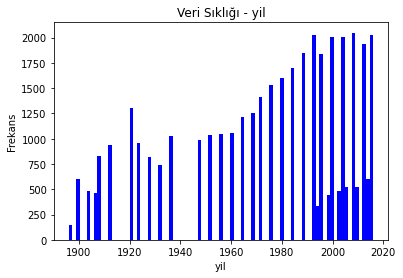

In [17]:
sayisal_degisken=["yas","boy", "kilo", "yil"]
for i in sayisal_degisken:
  plotHistogram(i)

In [18]:
#kutu grafiği ile çizmek istersek: 

def plotKutu(degisken):
  plt.boxplot(veri[degisken])
  plt.title("{} degiskeni kutu grafiği".format(degisken))
  plt.xlabel(degisken)
  plt.ylabel("Deger")
  plt.show()


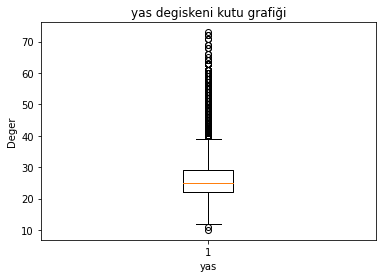

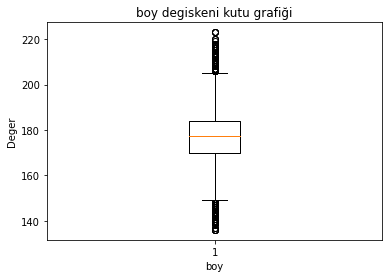

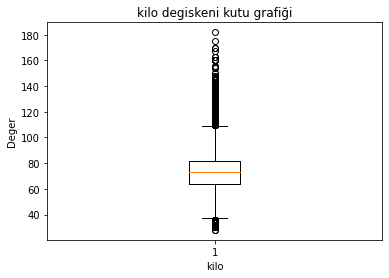

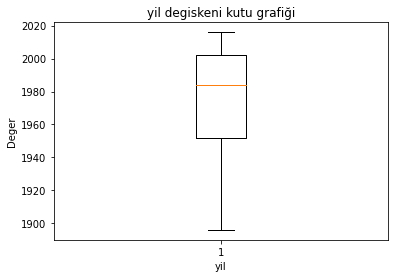

In [19]:
"""plt.boxplot(veri.yas)
plt.title("yas degisken kutu grafiği")
plt.xlabel("yas")
plt.ylabel("Deger")
plt.show()""" 
for i in sayisal_degisken:
  plotKutu(i)

### Kategorik Değişkenler
- isim
- cinsiyet 
- takim
- uok
- sezon 
- sehir
- spor
- etkinlik 
- madalya 
-> Kategorik Değişkenleri incelemek ve yorumlamak için bar grafiklerini kullanacağız. 
 

In [20]:
def plotBar(degisken, n=5):
  """
    girdi -> degisken/sütun ismi
      n-> gösterilecek eşsiz değer sayisi
    çıktı -> cubuk grafiği 
  
  """
  veri_=veri[degisken]
  veri_sayma= veri_.value_counts()
  veri_sayma=veri_sayma[:5]


  plt.figure()
  plt.bar(veri_sayma.index, veri_sayma, color="orange")
  plt.xticks(veri_sayma.index,veri_sayma.values)
  plt.xticks(rotation=45)
  plt.ylabel("Frekans")
  plt.title("Veri sıklığı - {} ".format(degisken))
  plt.show()
  print("{}: \n{}".format(degisken,veri_sayma))

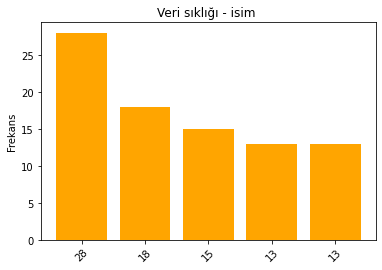

isim: 
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: isim, dtype: int64


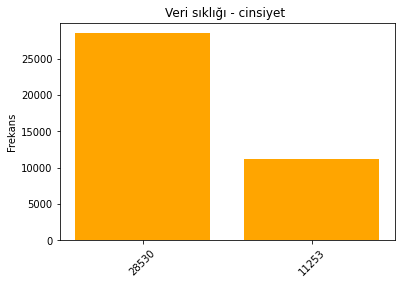

cinsiyet: 
M    28530
F    11253
Name: cinsiyet, dtype: int64


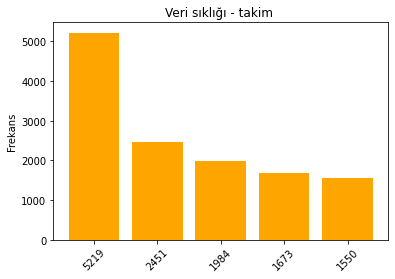

takim: 
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takim, dtype: int64


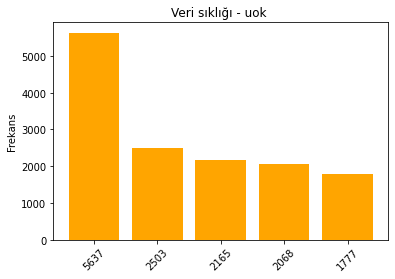

uok: 
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


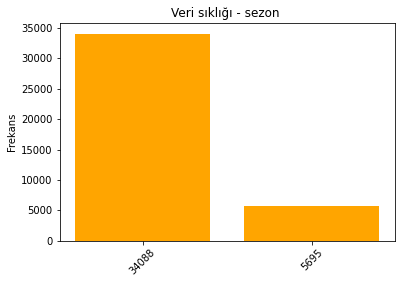

sezon: 
Summer    34088
Winter     5695
Name: sezon, dtype: int64


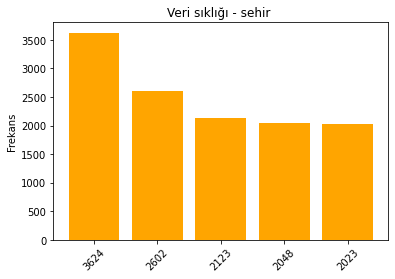

sehir: 
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: sehir, dtype: int64


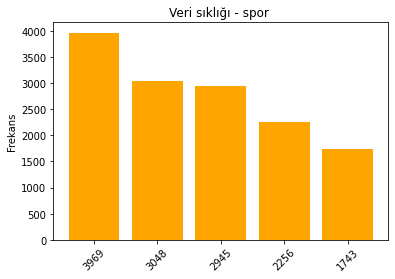

spor: 
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


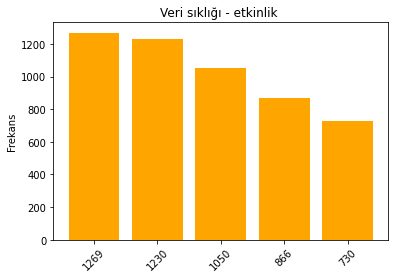

etkinlik: 
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


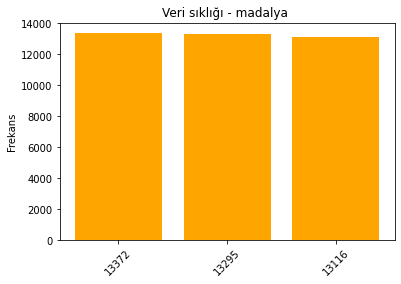

madalya: 
Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [21]:
kategorik_degiskenler=["isim","cinsiyet","takim","uok","sezon","sehir","spor","etkinlik","madalya"]
for i in kategorik_degiskenler:
  plotBar(i)

## Cinsiyete Göre Boy ve Ağırlık Karşılaştırması

In [22]:
erkek = veri[veri.cinsiyet == "M"]
erkek.head(3)


,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [23]:
kadin = veri[veri.cinsiyet == "F"]
kadin.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


<function matplotlib.pyplot.show>

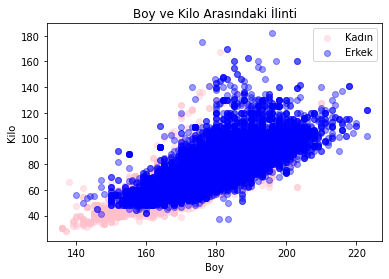

In [24]:
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha=0.4, label= "Kadın", color="pink")
plt.scatter(erkek.boy, erkek.kilo, alpha=0.4, label= "Erkek", color="blue")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlinti")
plt.legend()
plt.show

## Sayısal Sütunlar arasındaki İlişki

In [25]:
veri.loc[:,["yas","boy","kilo"]].corr() # ana korelasyon tablosu oluşturur

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


### Madalya ve Yaş Arasındaki İlişki 

In [26]:
veri_gecici= veri.copy()
veri_gecici=pd.get_dummies(veri_gecici, columns=["madalya"]) #madalya ordinal bir değişken olduğu için içinde ayrıştırma yaptık.
veri_gecici.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [27]:
veri_gecici.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


### Takimların kazandıkları Altın, Gümüş ve Bronz madalya sayıları

In [28]:
veri_gecici[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takim"], as_index= False).sum().sort_values(by="madalya_Gold", ascending=False)

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
...,...,...,...,...
230,Kerstin-1,3.0,0.0,0.0
226,K Division Metropolitan Police Team-3,8.0,0.0,0.0
224,Joy,0.0,0.0,2.0
220,Japan-1,0.0,0.0,2.0


### Madalyaların hangi şehirlerde kazanıldığı

In [29]:
veri_gecici[["sehir","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["sehir"], as_index= False).sum().sort_values(by="madalya_Gold", ascending=False)

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


### Cinsiyete göre kazanılan altın, gümüş ve Bronz madalya sayıları

In [30]:
veri_gecici[["cinsiyet","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["cinsiyet"], as_index= False).sum().sort_values(by="madalya_Gold", ascending=False)

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


# Çok Değişkenli Veri Analizi

In [31]:
veri_pivot= veri.pivot_table(index="madalya", columns="cinsiyet",
                       values=["boy","kilo","yas"],
                       aggfunc={"boy":np.mean,"kilo":np.mean,"yas":[min,max, np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

## Anamoli Tespiti 
-  Aykırı değer, diğer gözlemlerden önemli ölçüde farklı bir veri noktasıdır. Bir aykırı değer, ölçümdeki değişkenliğe bağlı olabilir veya deneysel hatayı gösterebilir; İkincisi bazen veri kümesinden çıkarılır. Bir aykırı değer istatiksel analizlerde ciddi sorunlara yol açabilir.

In [32]:
def anomaliTespiti(df, ozellik):
  outlier_indices= []

  for c in ozellik:
    # 1. ceyrek
    Q1= np.percentile(df[c],25)
    # 3. çeyrek 
    Q3= np.percentile(df[c],75)
    # IQR = Inter Quartile Range
    IQR = Q3-Q1
    # aykırı değerler için ek adım miktarı
    outlier_step= 1.5 *  IQR
    # aykırı değerleri ve bulunduğu indeksi tespit edelim.
    outlier_list_col= df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
    # tespit edilen indeksleri depolayalım 
    outlier_indices.extend(outlier_list_col)
  # essiz aykırı değerleri bulalım: 
  outlier_indices = Counter(outlier_indices)
  # eger bir örnek v adet sütunda farklı değer ise bunu aykırı değer kabul edelim
  multiple_outliers= list(i for i, v in outlier_indices.items() if v > 1 )
  return multiple_outliers

In [33]:
veri_anomali= veri.loc[anomaliTespiti(veri,["yas","kilo","boy"])]
veri_anomali.spor.value_counts()
# anomalinin en çok  görüldüğü branşlar aşağıdaki gibidir.

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: spor, dtype: int64

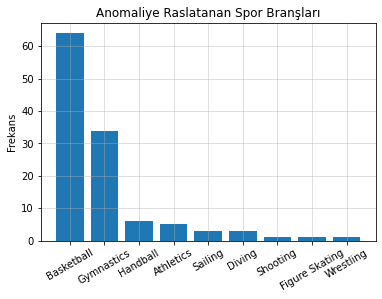

In [34]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index, veri_anomali.spor.value_counts().values)
plt.xticks(rotation=30)
plt.title("Anomaliye Raslatanan Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True, alpha=0.5)
plt.show()


In [35]:
veri_gym= veri_anomali[veri_anomali.spor== "Gymnastics"]
veri_gym

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
69222,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69225,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
80497,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


In [36]:
veri_gym.etkinlik.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: etkinlik, dtype: int64

- Jimnastikte meydana gelen anomali sonucunda veriyi incelediğimizde anomalinin nedeni sporcuların yaşlarının küçük vekiloların az olmasından kaynaklıdır
- Ayrıca jimnastikte meydana gelen anomalilerin hepsi kadın sporcular tarafından gerçekleşmiştir.

In [37]:
veri_basketbol=veri_anomali[veri_anomali.spor == "Basketball"]
veri_basketbol

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270119,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
270120,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
270121,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
270740,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [38]:
veri_basketbol.etkinlik.value_counts()
#çıktıda görüldüğü üzere basketbol oynayan erkek oyuncuların 
#boylarının uzun ve kiloların fazla olmasından kaynaklı anomali tespit edilmiştir.

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: etkinlik, dtype: int64

# Zaman Serilerinde Veri Analizi
- yıllara göre ortalama yaş, boy ve kilo değişimi
- yıllara göre madalya sayıları

In [39]:
veri_zaman= veri.copy()
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [40]:
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896])

In [41]:
#olimpiyatların yapıldığı yılları sıralayalım
dizili_array= np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

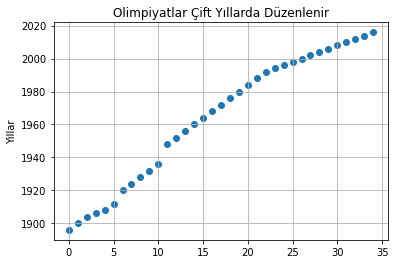

In [42]:
plt.figure()
plt.scatter(range(len(dizili_array)), dizili_array)
plt.grid(True)
plt.ylabel("Yillar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()


In [43]:
#veri içerisinde bulunan yıl değerlerini datetime veri tipine dönüştürelim
tarih_saat_nesnesi= pd.to_datetime(veri_zaman["yil"],format = '%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head()

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
40   2014-01-01
41   1948-01-01
Name: yil, dtype: datetime64[ns]

In [44]:
veri_zaman["tarih_saat"]= tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [45]:
# veri_zaman değişkenin ana indeksini, datatime olan tarih_saat değerine güncelleyelim
veri_zaman= veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis=1, inplace=True)
veri_zaman

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
1956-01-01,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
1964-01-01,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
1980-01-01,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


## Yıllara Göre Ortalama Yaş, Boy ve Kilo Değişimi

In [46]:
periyodik_veri=veri_zaman.resample("2A").mean() # 2 yıllık periyotlar halinde ortalama alıyor
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [48]:
#kayıp verileri çıkaralım
periyodik_veri.dropna(axis=0 , inplace= True)
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 432x288 with 0 Axes>

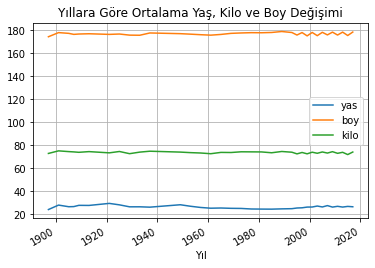

In [49]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara Göre Ortalama Yaş, Kilo ve Boy Değişimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

## Yıllara Göre Madalya Değişimi


In [51]:
veri_zaman=pd.get_dummies(veri_zaman, columns=["madalya"])
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [53]:
periyodik_veri=veri_zaman.resample("2A").sum()
periyodik_veri.head()
#kayıp verileri çıkaralım:
periyodik_veri=periyodik_veri[~(periyodik_veri==0).any(axis=1)]
periyodik_veri.tail()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710.0,671.0,667.0
2010-12-31,13896.0,91395.00,37877.12,171.0,174.0,175.0
2012-12-31,50595.0,346091.47,143102.94,679.0,632.0,630.0
2014-12-31,15907.0,104686.00,42838.63,198.0,202.0,197.0
2016-12-31,53256.0,360846.03,149628.71,703.0,665.0,655.0


<Figure size 432x288 with 0 Axes>

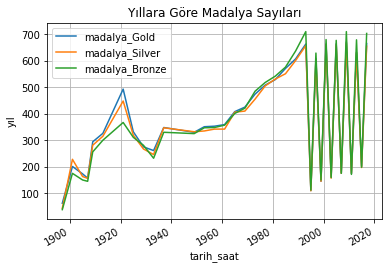

In [54]:
plt.figure()
periyodik_veri.loc[:,["madalya_Gold","madalya_Silver","madalya_Bronze"]].plot()
plt.title("Yıllara Göre Madalya Sayıları")
plt.ylabel("yıl")
plt.grid(True)
plt.show()

## Yıllara ve Sezonlara Göre Madalya SAyıları


In [55]:
yaz = veri_zaman[veri_zaman.sezon== "Summer"]
kis = veri_zaman[veri_zaman.sezon== "Winter"]
kis.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [56]:
periyodik_veri_kis=kis.resample("A").sum()
periyodik_veri_kis=periyodik_veri_kis[~(periyodik_veri_kis== 0).any(axis=1)]
periyodik_veri_kis.head(3)

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32


In [57]:
periyodik_veri_yaz=yaz.resample("A").sum()
periyodik_veri_yaz=periyodik_veri_yaz[~(periyodik_veri_yaz== 0).any(axis=1)]
periyodik_veri_yaz.head(3)

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38.0,62.0,43.0
1900-12-31,16783.16,107440.91,45287.89,175.0,201.0,228.0
1904-12-31,12812.84,86139.17,36124.78,150.0,173.0,163.0


<Figure size 432x288 with 0 Axes>

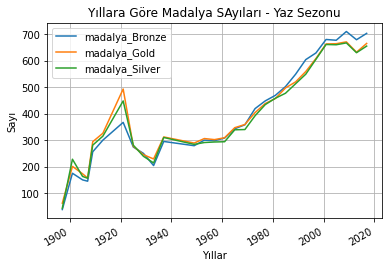

<Figure size 432x288 with 0 Axes>

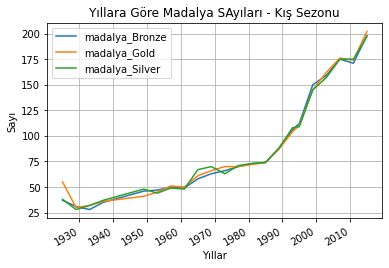

In [58]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya SAyıları - Yaz Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıllar")
plt.grid(True)
plt.show()


plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya SAyıları - Kış Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıllar")
plt.grid(True)
plt.show()